<a href="https://colab.research.google.com/github/Zuzed22/Machine-Learning/blob/main/IA_aumentada_previsi%C3%B3n_atrasos_de_vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- import pandas as pd
- import numpy as np
- import sklearn
- import seaborn as sns
- import yellowbrick

print(f'Versión de pandas: {pd.__version__}')

print(f'Versión de numpy: {np.__version__}')

print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')

print(f'Versión de seaborn: {sns.__version__}')

print(f'Versión de yellowbrick: {yellowbrick.__version__}')

## Leer el archivo CSV utilizando Pandas

In [52]:
import pandas as pd

datos = pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [53]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


## Estadísticas descriptivas utilizando los métodos describe y info

In [54]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [55]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [56]:
datos.describe(include= 'O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## Visualizaciones gráficas

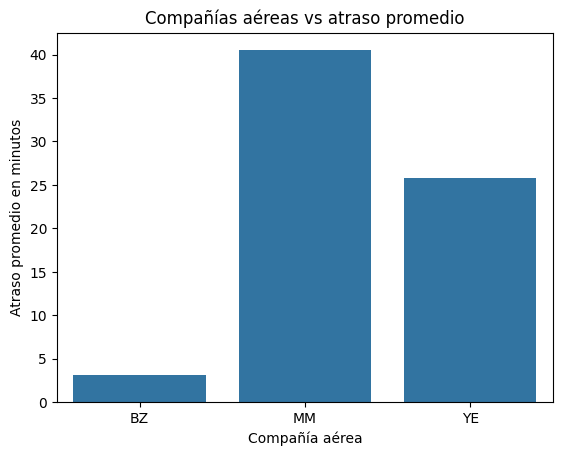

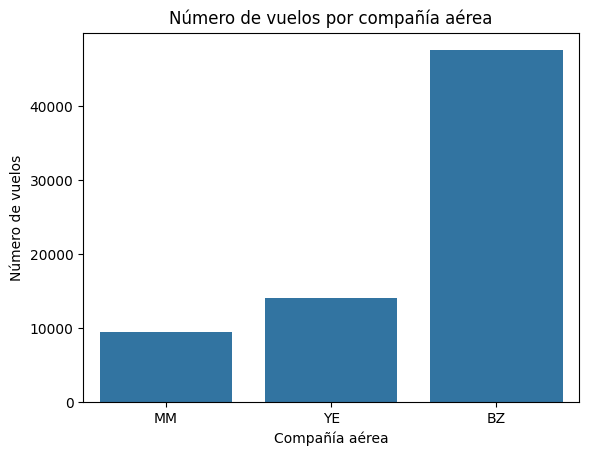

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data= avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x= 'airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

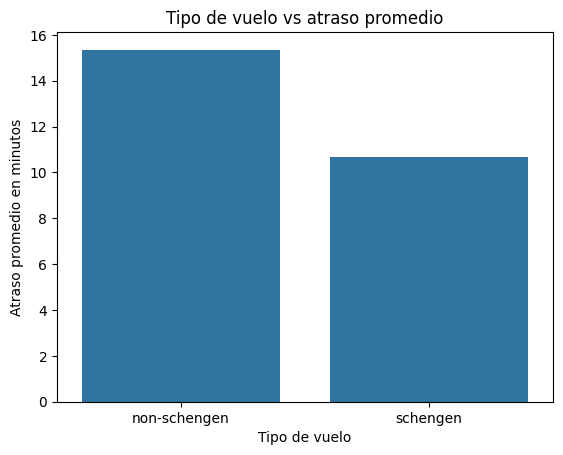

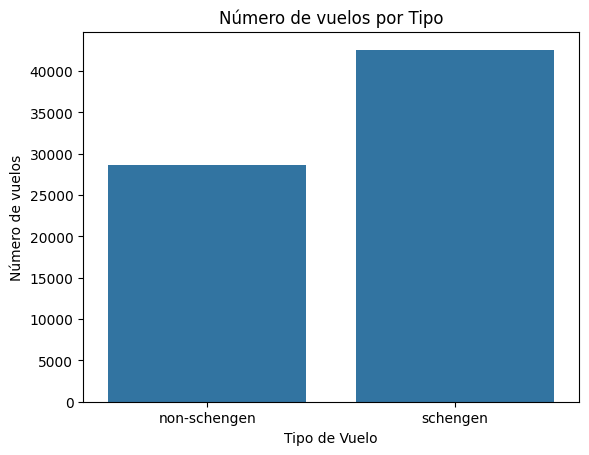

In [58]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data= avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x= 'schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

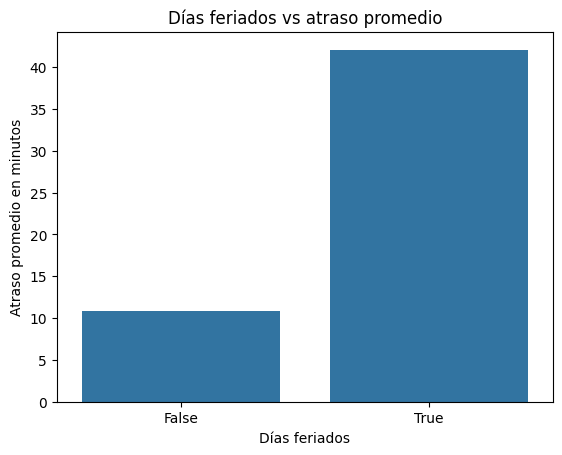

In [59]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data= avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [60]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

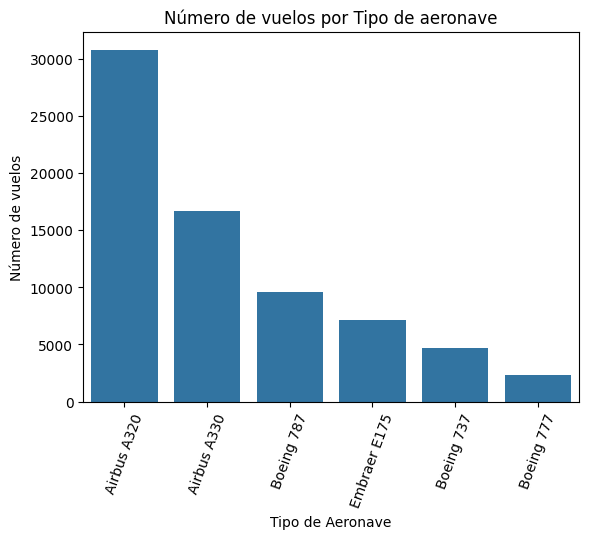

In [61]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data= datos, x= 'aircraft_type', order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

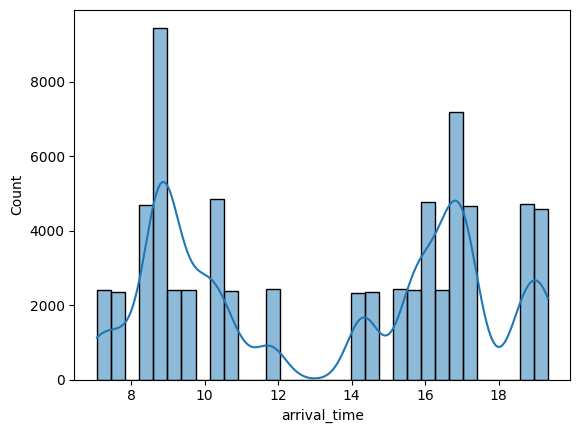

In [62]:
sns.histplot(data=datos, x='arrival_time', kde=True)

## Distribución de los datos

Es importante analizar la distribución de los datos antes de ingresarlos en un modelo de regresión para garantizar que el modelo sea apropiado para los datos. La distribución de estos puede afectar la precisión del modelo, por lo que es importante asegurarse de que los datos estén distribuidos de manera adecuada antes de realizar el análisis. Además, el análisis de la distribución de los datos puede ayudar a identificar valores atípicos y decidir cómo manejarlos antes de realizar el análisis.

El primer paso es definir un ancho para los bins. Los bins, en un histograma, son intervalos de valores que se utilizan para agrupar los datos en clases. Para definir este ancho, utilizaremos la Regla de Freedman-Diaconis que matemáticamente se define como:

La definición matemática de la Regla Freedman-Diaconis es la siguiente: del lado izquierdo de la ecuación, tenemos "anchoBin", y del lado derecho de la igualdad, tenemos "2 veces el rango intercuartílico dividido por la raíz cúbica de n"

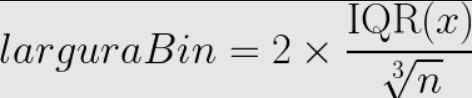

In [63]:
import numpy as np

def ancho_bin(df, columna):
 q75,q25 = np.percentile(df[columna],[75,25])
 iqr = q75 - q25
 ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
 return ancho

Ahora vamos a construir los histogramas para la hora de llegada y la hora de salida de los aviones.

<Axes: xlabel='arrival_time', ylabel='Count'>

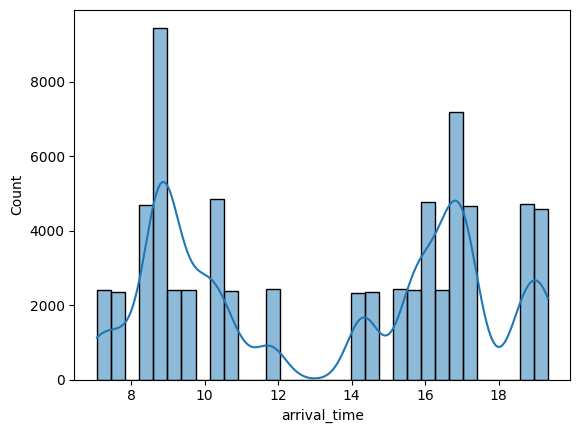

In [64]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth= binwidth)

<Axes: xlabel='arrival_time', ylabel='Count'>

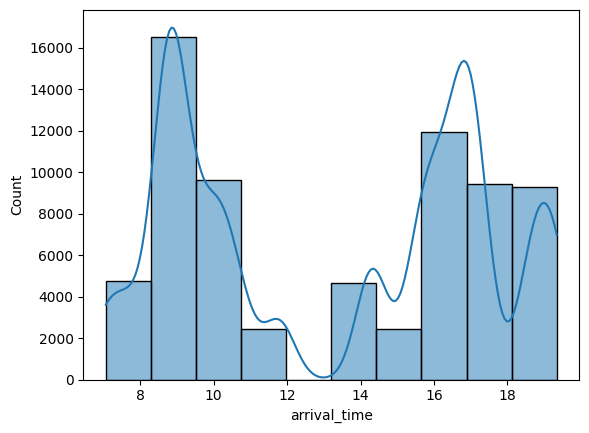

In [65]:
sns.histplot(data=datos, x='arrival_time', kde=True, bins= 10)

<Axes: xlabel='departure_time', ylabel='Count'>

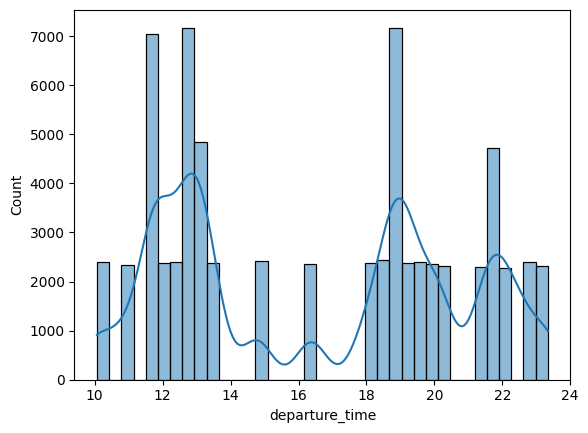

In [66]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth= binwidth)

Y por último, vamos a construir un boxplot y un histograma de la variable objetivo (delay).

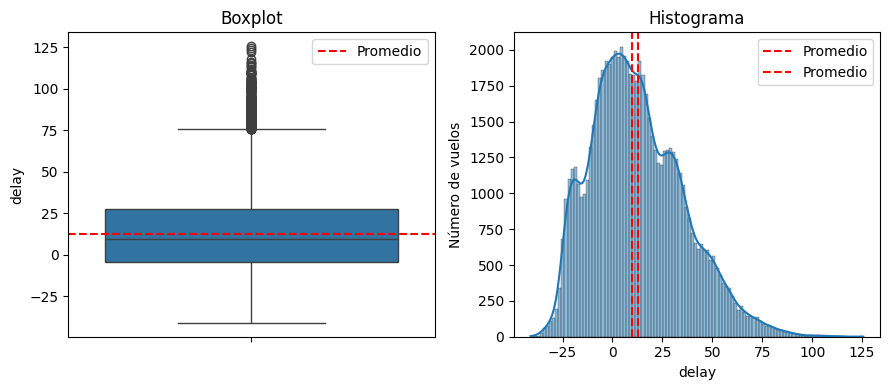

In [67]:
atraso_promedio = datos ['delay'].mean()
atraso_mediana = datos ['delay'].median()

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax= ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle= '--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde= True, binwidth= binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle= '--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='r', linestyle= '--', label='Promedio')
ax[1].legend()

plt.tight_layout()

plt.show()
